In [0]:
!pip install cirq

In [0]:
import cirq
import math

#Task 1

###Implement a simple quantum operation with Cirq

1. With 5 qubits
2. Apply Hadamard operation on every qubit
3. Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
4. SWAP (0, 4)
5. Rotate X with pi/2
6. Plot the circuit

In [2]:
# Creating a simple circuit with 5 qubits
length = 5
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(length)

for i in range(5):
    # Applying Hadamard Gate to all the qubits 
    circuit.append([cirq.H(qubits[i])])

# Applying Controlled NOT gate (0, 1), (1,2), (2,3), (3,4)
circuit.append([
    cirq.CNOT(qubits[0],qubits[1]),
    cirq.CNOT(qubits[1],qubits[2]),
    cirq.CNOT(qubits[2],qubits[3]),
    cirq.CNOT(qubits[3],qubits[4]),
])

# Swapping gate 0 and gate 4
circuit.append([cirq.SWAP(qubits[0],qubits[4])])

# Rotating all the qubits with Pauli Gate X with pi/2 around X
rot = cirq.rx(math.pi/2)
circuit.append([rot(qubits[1]),rot(qubits[2]),rot(qubits[3]),rot(qubits[4])])

# Measuring the qubits
for i in range(length):
    circuit.append(cirq.measure(qubits[i],key=f"q{i}"))

# Plotting the circuit
print (circuit)


                                        ┌─────────┐
0: ───H───@──────────────────────────────×────────────M('q0')──────────────
          │                              │
1: ───H───X───@───Rx(0.5π)───M('q1')─────┼─────────────────────────────────
              │                          │
2: ───H───────X───@──────────Rx(0.5π)────┼M('q2')──────────────────────────
                  │                      │
3: ───H───────────X──────────@───────────┼Rx(0.5π)────M('q3')──────────────
                             │           │
4: ───H──────────────────────X───────────×────────────Rx(0.5π)───M('q4')───
                                        └─────────┘


In [3]:
# Running the circuir on a simulator
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=10000)

# finding the probabilities of state |0> and |1>
for i in range(length):
    prob1 = result.measurements[f'q{i}'].sum()/len(result.measurements[f'q{i}'])
    prob0 = 1-prob1
    print (f"q{i} : {result.histogram(key=f'q{i}')} | prob0 : {prob0:5f} | prob1 : {prob1:5f}")


q0 : Counter({1: 5009, 0: 4991}) | prob0 : 0.499100 | prob1 : 0.500900
q1 : Counter({1: 5006, 0: 4994}) | prob0 : 0.499400 | prob1 : 0.500600
q2 : Counter({1: 5034, 0: 4966}) | prob0 : 0.496600 | prob1 : 0.503400
q3 : Counter({0: 5008, 1: 4992}) | prob0 : 0.500800 | prob1 : 0.499200
q4 : Counter({0: 5064, 1: 4936}) | prob0 : 0.506400 | prob1 : 0.493600


# Task 2

Create a circuit that is a series of small `cirq.Rx` rotations and plot the  probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

In [11]:
# Create a circuit with sequentially increasing rotations of 0.1 rad
circuit2 = cirq.Circuit()
i=1
while(i<=16):
    j=1
    r=0.1
    while (j<=i):
        r = 0.1*j
        # multiplying with 2 since cirq.rx halves the rotation
        rot_x = cirq.rx(r*2)
        qubit = cirq.LineQubit(i)
        circuit2.append(rot_x(qubit))
        j+=1

    circuit2.append(cirq.measure(qubit,key=f'q{i}'))
    i+=1

print(circuit2)

1: ────Rx(0.064π)───M('q1')─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

2: ────Rx(0.064π)───Rx(0.127π)───M('q2')────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

3: ────Rx(0.064π)───Rx(0.127π)───Rx(0.191π)───M('q3')───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

4: ────Rx(0.064π)───Rx(0.127π)───Rx(0.191π)───Rx(0.255π)───M('q4')──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

5: ────Rx(0.064π)───Rx(0.127π)───Rx(0.191π)───Rx(0.255π)───Rx(0.318π)───M('q5')─────────────────

In [0]:
sim = cirq.Simulator()
results2 = sim.run(circuit2,repetitions=100000)

In [15]:
# Calculating probabilities of |0> after every roation
prob_0 = []
prob_1 = []
for i in range(1,17):
    prob1 = results2.measurements[f'q{i}'].sum()/len(results2.measurements[f'q{i}'])
    prob0 = 1-prob1
    print (f"Rotations: {i} | prob0 : {prob0:5f} prob1 : {prob1:5f} | {results2.histogram(key=f'q{i}')}")
    prob_0.append(prob0)
    prob_1.append(prob1)

Rotations: 1 | prob0 : 0.990290 prob1 : 0.009710 | Counter({0: 99029, 1: 971})
Rotations: 2 | prob0 : 0.913070 prob1 : 0.086930 | Counter({0: 91307, 1: 8693})
Rotations: 3 | prob0 : 0.680350 prob1 : 0.319650 | Counter({0: 68035, 1: 31965})
Rotations: 4 | prob0 : 0.292590 prob1 : 0.707410 | Counter({1: 70741, 0: 29259})
Rotations: 5 | prob0 : 0.004980 prob1 : 0.995020 | Counter({1: 99502, 0: 498})
Rotations: 6 | prob0 : 0.257130 prob1 : 0.742870 | Counter({1: 74287, 0: 25713})
Rotations: 7 | prob0 : 0.887230 prob1 : 0.112770 | Counter({0: 88723, 1: 11277})
Rotations: 8 | prob0 : 0.804680 prob1 : 0.195320 | Counter({0: 80468, 1: 19532})
Rotations: 9 | prob0 : 0.044910 prob1 : 0.955090 | Counter({1: 95509, 0: 4491})
Rotations: 10 | prob0 : 0.501700 prob1 : 0.498300 | Counter({0: 50170, 1: 49830})
Rotations: 11 | prob0 : 0.902030 prob1 : 0.097970 | Counter({0: 90203, 1: 9797})
Rotations: 12 | prob0 : 0.002860 prob1 : 0.997140 | Counter({1: 99714, 0: 286})
Rotations: 13 | prob0 : 0.899470 p

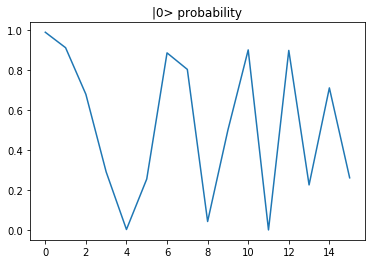

In [16]:
import matplotlib.pyplot as plt

# Probability of |0> after every rotation
plt.title("probability of qubit in |0> after measurement")
plt.plot(prob_0)
plt.show()

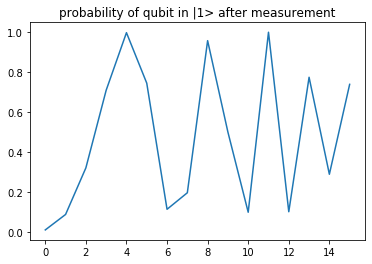

In [18]:
# Probability of |1> after every rotation
plt.title("probability of qubit in |1> after measurement")
plt.plot(prob_1)
plt.show()